# 제주특별자치도 BC카드 사용 데이터 EDA분석 연습 (2014~2016)

데이터 링크 : https://www.data.go.kr/data/15046091/fileData.do

## 분석 결론
- 2014년 9월~2016년 8월까지의 데이터 : 연도에 따른 데이터의 양이 다르기 때문에 연도별로 나눈 데이터 시각화는 신뢰성이 떨어진다.
- 카드이용건수와 카드이용금액은 강한 양의 상관관계를 가진다.
- 20대에 비해 30~50대의 카드이용금액이 높다.
- 기념품과 슈퍼마켓은 건당 이용금액은 낮지만, 총 카드이용금액은 높다.
- 제주 중분류 중 “제주시 연동”의 결제 건수가 가장 많다. 그 중에서도 슈퍼마켓이 이용 건수가 많은데, 제주공항과 가장 가까운 시내이기 때문에 방문객이 많았을 거라고 예상된다.
- 용담 2동에서의 기념품점 소비가 월등히 높다. 용담2동에 제주공항이 있기 때문이라고 생각된다.

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<AxesSubplot:title={'center':'한글'}>

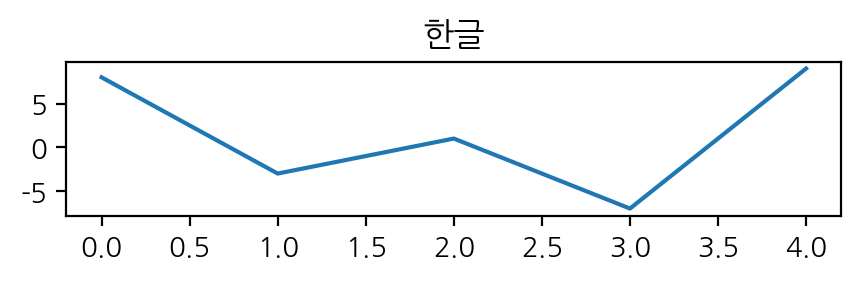

In [2]:
# 한글 폰트 사용
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([8,-3, 1, -7, 9]).plot(title="한글", figsize=(5,1))

In [3]:
# 파일이 같은 경로에 있는지 확인
from glob import glob

glob("제주특별*.csv")

['제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv']

In [4]:
# read_csv 불러오기, df 변수에 담기
df = pd.read_csv('제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv', encoding="cp949")
df

기준년월   관광객 유형 제주 대분류 제주 중분류     업종명 성별 연령대별   카드이용금액    카드이용건수   \
0      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  여  50대  14434000        67   
1      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  남  50대  15119000        72   
2      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  여  40대   7609500        41   
3      2014-09  내국인 관광객   서귀포시    남원읍   농축수산품  남  50대   7092500        40   
4      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  남  40대   9098500        59   
...        ...      ...    ...    ...     ... ..  ...       ...       ...   
13141  2016-08  내국인 관광객   서귀포시    남원읍      약국  남  30대    252900        43   
13142  2016-08  내국인 관광객   서귀포시    대륜동      약국  남  20대    276100        49   
13143  2016-08  내국인 관광객   서귀포시    대륜동  기타음료식품  남  30대    610850       118   
13144  2016-08  내국인 관광객   서귀포시    대륜동  기타음료식품  여  20대    416900        85   
13145  2016-08  내국인 관광객   서귀포시    대륜동  기타음료식품  여  50대     56200        12   

       건당이용금액     데이터기준일자  
0      215433  2017-02-16  
1      209986  2017-02-16  
2      185598  2017-02-16  
3      177313  2017-02-16  
4      154212  2017-02-16  
...       ...         ...  
13141    5881  2017-02-16  
13142    5635  2017-02-16  
13143    5177  2017-02-16  
13144    4905  2017-02-16  
13145    4683  2017-02-16  

[13146 rows x 11 columns]

# 데이터 파악

In [5]:
df.shape

(13146, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   관광객 유형    13146 non-null  object
 2   제주 대분류    13146 non-null  object
 3   제주 중분류    13146 non-null  object
 4   업종명       13146 non-null  object
 5   성별        13146 non-null  object
 6   연령대별      13146 non-null  object
 7    카드이용금액   13146 non-null  int64 
 8    카드이용건수   13146 non-null  int64 
 9   건당이용금액    13146 non-null  int64 
 10  데이터기준일자   13146 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [7]:
df.describe()

카드이용금액        카드이용건수          건당이용금액
count  1.314600e+04  13146.000000   13146.000000
mean   3.697184e+06    133.308079   35163.811273
std    6.232327e+06    210.459082   35421.702281
min    3.610000e+04     10.000000    3520.000000
25%    5.958600e+05     23.000000   13939.250000
50%    1.533550e+06     54.000000   21007.500000
75%    3.863175e+06    143.000000   46235.750000
max    6.427770e+07   2574.000000  539047.000000

In [8]:
df.describe(include="object")

기준년월   관광객 유형 제주 대분류 제주 중분류    업종명     성별   연령대별     데이터기준일자
count     13146    13146  13146  13146  13146  13146  13146       13146
unique       24        1      2     10     14      2      4           1
top     2016-08  내국인 관광객    제주시     연동  슈퍼 마켓      남    30대  2017-02-16
freq        610    13146   8729   2063   1911   6609   3565       13146

In [9]:
df[df["관광객 유형"]=="외국인 관광객"]

# 관광객 유형이 unique값이 1개인 것을 보고, "외국인 관광객"을 찾아 본 결과 데이터가 없다.
# 결론 : 관광객 유형 데이터는 삭제해도 되겠다.

Empty DataFrame
Columns: [기준년월, 관광객 유형, 제주 대분류, 제주 중분류, 업종명, 성별, 연령대별,  카드이용금액 ,  카드이용건수 , 건당이용금액, 데이터기준일자]
Index: []

# 전처리

## 결측치

In [10]:
df.isnull().sum()
# 결측치가 없다.

기준년월        0
관광객 유형      0
제주 대분류      0
제주 중분류      0
업종명         0
성별          0
연령대별        0
 카드이용금액     0
 카드이용건수     0
건당이용금액      0
데이터기준일자     0
dtype: int64

In [11]:
df.nunique()

기준년월           24
관광객 유형          1
제주 대분류          2
제주 중분류         10
업종명            14
성별              2
연령대별            4
 카드이용금액     11947
 카드이용건수       965
건당이용금액      11515
데이터기준일자         1
dtype: int64

## 컬럼 제거

In [12]:
# 관광객 유형, # 데이터 기준 일자 제거
# 아래와 같은 방법으로 관광객 유형 컬럼을 전처리 가능하지만, 필요 없는 컬럼이기 때문에 삭제한다.
# df["유형"] = df["관광객 유형"].str.replace("관광객", "").str.strip()
df = df.drop(columns=["데이터기준일자", "관광객 유형"])

In [13]:
df.head()

기준년월 제주 대분류 제주 중분류    업종명 성별 연령대별   카드이용금액    카드이용건수   건당이용금액
0  2014-09   서귀포시    대륜동  농축수산품  여  50대  14434000        67  215433
1  2014-09   서귀포시    대륜동  농축수산품  남  50대  15119000        72  209986
2  2014-09   서귀포시    대륜동  농축수산품  여  40대   7609500        41  185598
3  2014-09   서귀포시    남원읍  농축수산품  남  50대   7092500        40  177313
4  2014-09   서귀포시    대륜동  농축수산품  남  40대   9098500        59  154212

## 파생변수 만들기 - 연, 월

In [14]:
## 파생변수 만들기 - 연, 월
# 판다스의 datetime을 이용해 object 타입이던 "기준년월"컬럼을 datetime 자료형으로 바꿈.
#import datetime
# df["기준년월"]=pd.to_datetime(df["기준년월"], format="%Y-%m")
# df.info()

In [15]:
# df["연"]=df["기준년월"].dt.year
# df["월"]=df["기준년월"].dt.month

In [16]:
df["연"]=df["기준년월"].map(lambda x : int(x.split("-")[0]))
df["월"]=df["기준년월"].map(lambda x: int(x.split("-")[1]))
# df["기준연월"].str.split("-", expand=True)[0].astype(int)

In [17]:
# 성별 여, 남을 1,2로 바꿔보는 연습
# gender_dict={"남" : 1, "여" : 2}
# df["gender"] = df["성별"].map(gender_dict)
# 성별 여, 남을 여자, 남자로 바꿔보는 연습
# df["gender_2"] = df["성별"].str.replace("여", "여자")
# df["gender_2"] = df["성별"].str.replace("남", "남자")
# df = df.drop(columns=["gender", "gender_2"])

# 기술통계

In [18]:
# df.describe().T
df.describe()

카드이용금액        카드이용건수          건당이용금액             연             월
count  1.314600e+04  13146.000000   13146.000000  13146.000000  13146.000000
mean   3.697184e+06    133.308079   35163.811273   2015.196333      6.485395
std    6.232327e+06    210.459082   35421.702281      0.683683      3.388676
min    3.610000e+04     10.000000    3520.000000   2014.000000      1.000000
25%    5.958600e+05     23.000000   13939.250000   2015.000000      4.000000
50%    1.533550e+06     54.000000   21007.500000   2015.000000      6.000000
75%    3.863175e+06    143.000000   46235.750000   2016.000000      9.000000
max    6.427770e+07   2574.000000  539047.000000   2016.000000     12.000000

In [19]:
df.describe(include="object")

기준년월 제주 대분류 제주 중분류    업종명     성별   연령대별
count     13146  13146  13146  13146  13146  13146
unique       24      2     10     14      2      4
top     2016-08    제주시     연동  슈퍼 마켓      남    30대
freq        610   8729   2063   1911   6609   3565

In [20]:
# 연동에서 제일 많이 찾은 업종명 찾기
df.loc[df["제주 중분류"]=="연동", "업종명"].value_counts()

스포츠레져용품    192
의원         192
기념품 점      192
슈퍼 마켓      192
약국         192
스넥         192
정장(여성)     188
농축수산품      188
악세 사리      159
기타음료식품     152
안경         143
신   발       80
귀 금 속        1
Name: 업종명, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   제주 대분류    13146 non-null  object
 2   제주 중분류    13146 non-null  object
 3   업종명       13146 non-null  object
 4   성별        13146 non-null  object
 5   연령대별      13146 non-null  object
 6    카드이용금액   13146 non-null  int64 
 7    카드이용건수   13146 non-null  int64 
 8   건당이용금액    13146 non-null  int64 
 9   연         13146 non-null  int64 
 10  월         13146 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.1+ MB


## 카드이용금액이 가장 큰 사람

In [22]:
# 카드이용금액이 가장 큰 사람의 카드이용건수 찾으려는 분석 중 key에러가 계속 발생
# 컬럼명을 확인해보니 카드이용금액, 카드이용건수 컬럼에 공백 존재
# 공백 제거하는 전처리
df.columns

Index(['기준년월', '제주 대분류', '제주 중분류', '업종명', '성별', '연령대별', ' 카드이용금액 ', ' 카드이용건수 ',
       '건당이용금액', '연', '월'],
      dtype='object')

In [23]:
# df[' 카드이용금액 '].str.strip() 하면 object타입이 아니라서 str accessor를 사용할 수 없다고 한다.
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['기준년월', '제주대분류', '제주중분류', '업종명', '성별', '연령대별', '카드이용금액', '카드이용건수',
       '건당이용금액', '연', '월'],
      dtype='object')

In [24]:
# 카드이용금액이 가장 큰 사람의 카드이용건수 찾기
card_max = df.loc[df["카드이용금액"]==df["카드이용금액"].max(), "카드이용건수"]
df[df["카드이용건수"].isin(card_max)].sort_values(["카드이용건수", "카드이용금액"])

기준년월 제주대분류 제주중분류    업종명 성별 연령대별    카드이용금액  카드이용건수  건당이용금액     연  월
12789  2016-08   제주시  용담2동  기념품 점  여  20대  64277700    2543   25276  2016  8

In [25]:
df

기준년월 제주대분류 제주중분류     업종명 성별 연령대별    카드이용금액  카드이용건수  건당이용금액     연  월
0      2014-09  서귀포시   대륜동   농축수산품  여  50대  14434000      67  215433  2014  9
1      2014-09  서귀포시   대륜동   농축수산품  남  50대  15119000      72  209986  2014  9
2      2014-09  서귀포시   대륜동   농축수산품  여  40대   7609500      41  185598  2014  9
3      2014-09  서귀포시   남원읍   농축수산품  남  50대   7092500      40  177313  2014  9
4      2014-09  서귀포시   대륜동   농축수산품  남  40대   9098500      59  154212  2014  9
...        ...   ...   ...     ... ..  ...       ...     ...     ...   ... ..
13141  2016-08  서귀포시   남원읍      약국  남  30대    252900      43    5881  2016  8
13142  2016-08  서귀포시   대륜동      약국  남  20대    276100      49    5635  2016  8
13143  2016-08  서귀포시   대륜동  기타음료식품  남  30대    610850     118    5177  2016  8
13144  2016-08  서귀포시   대륜동  기타음료식품  여  20대    416900      85    4905  2016  8
13145  2016-08  서귀포시   대륜동  기타음료식품  여  50대     56200      12    4683  2016  8

[13146 rows x 11 columns]

# 히스토그램

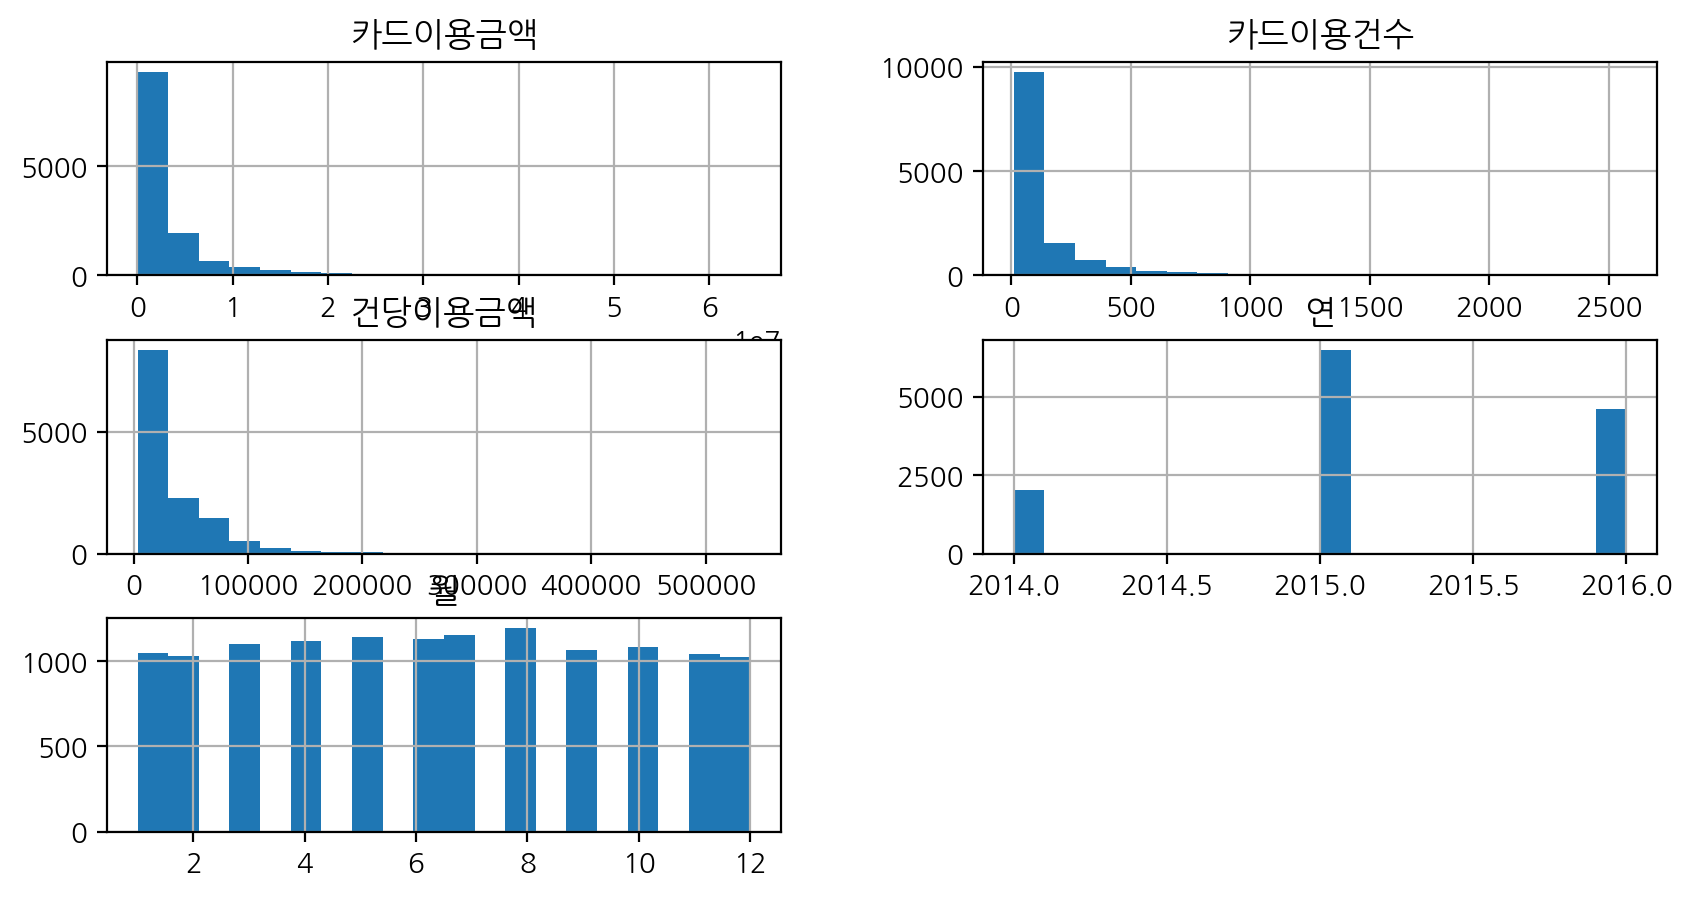

In [26]:
df.hist(bins=20, figsize=(10,5));

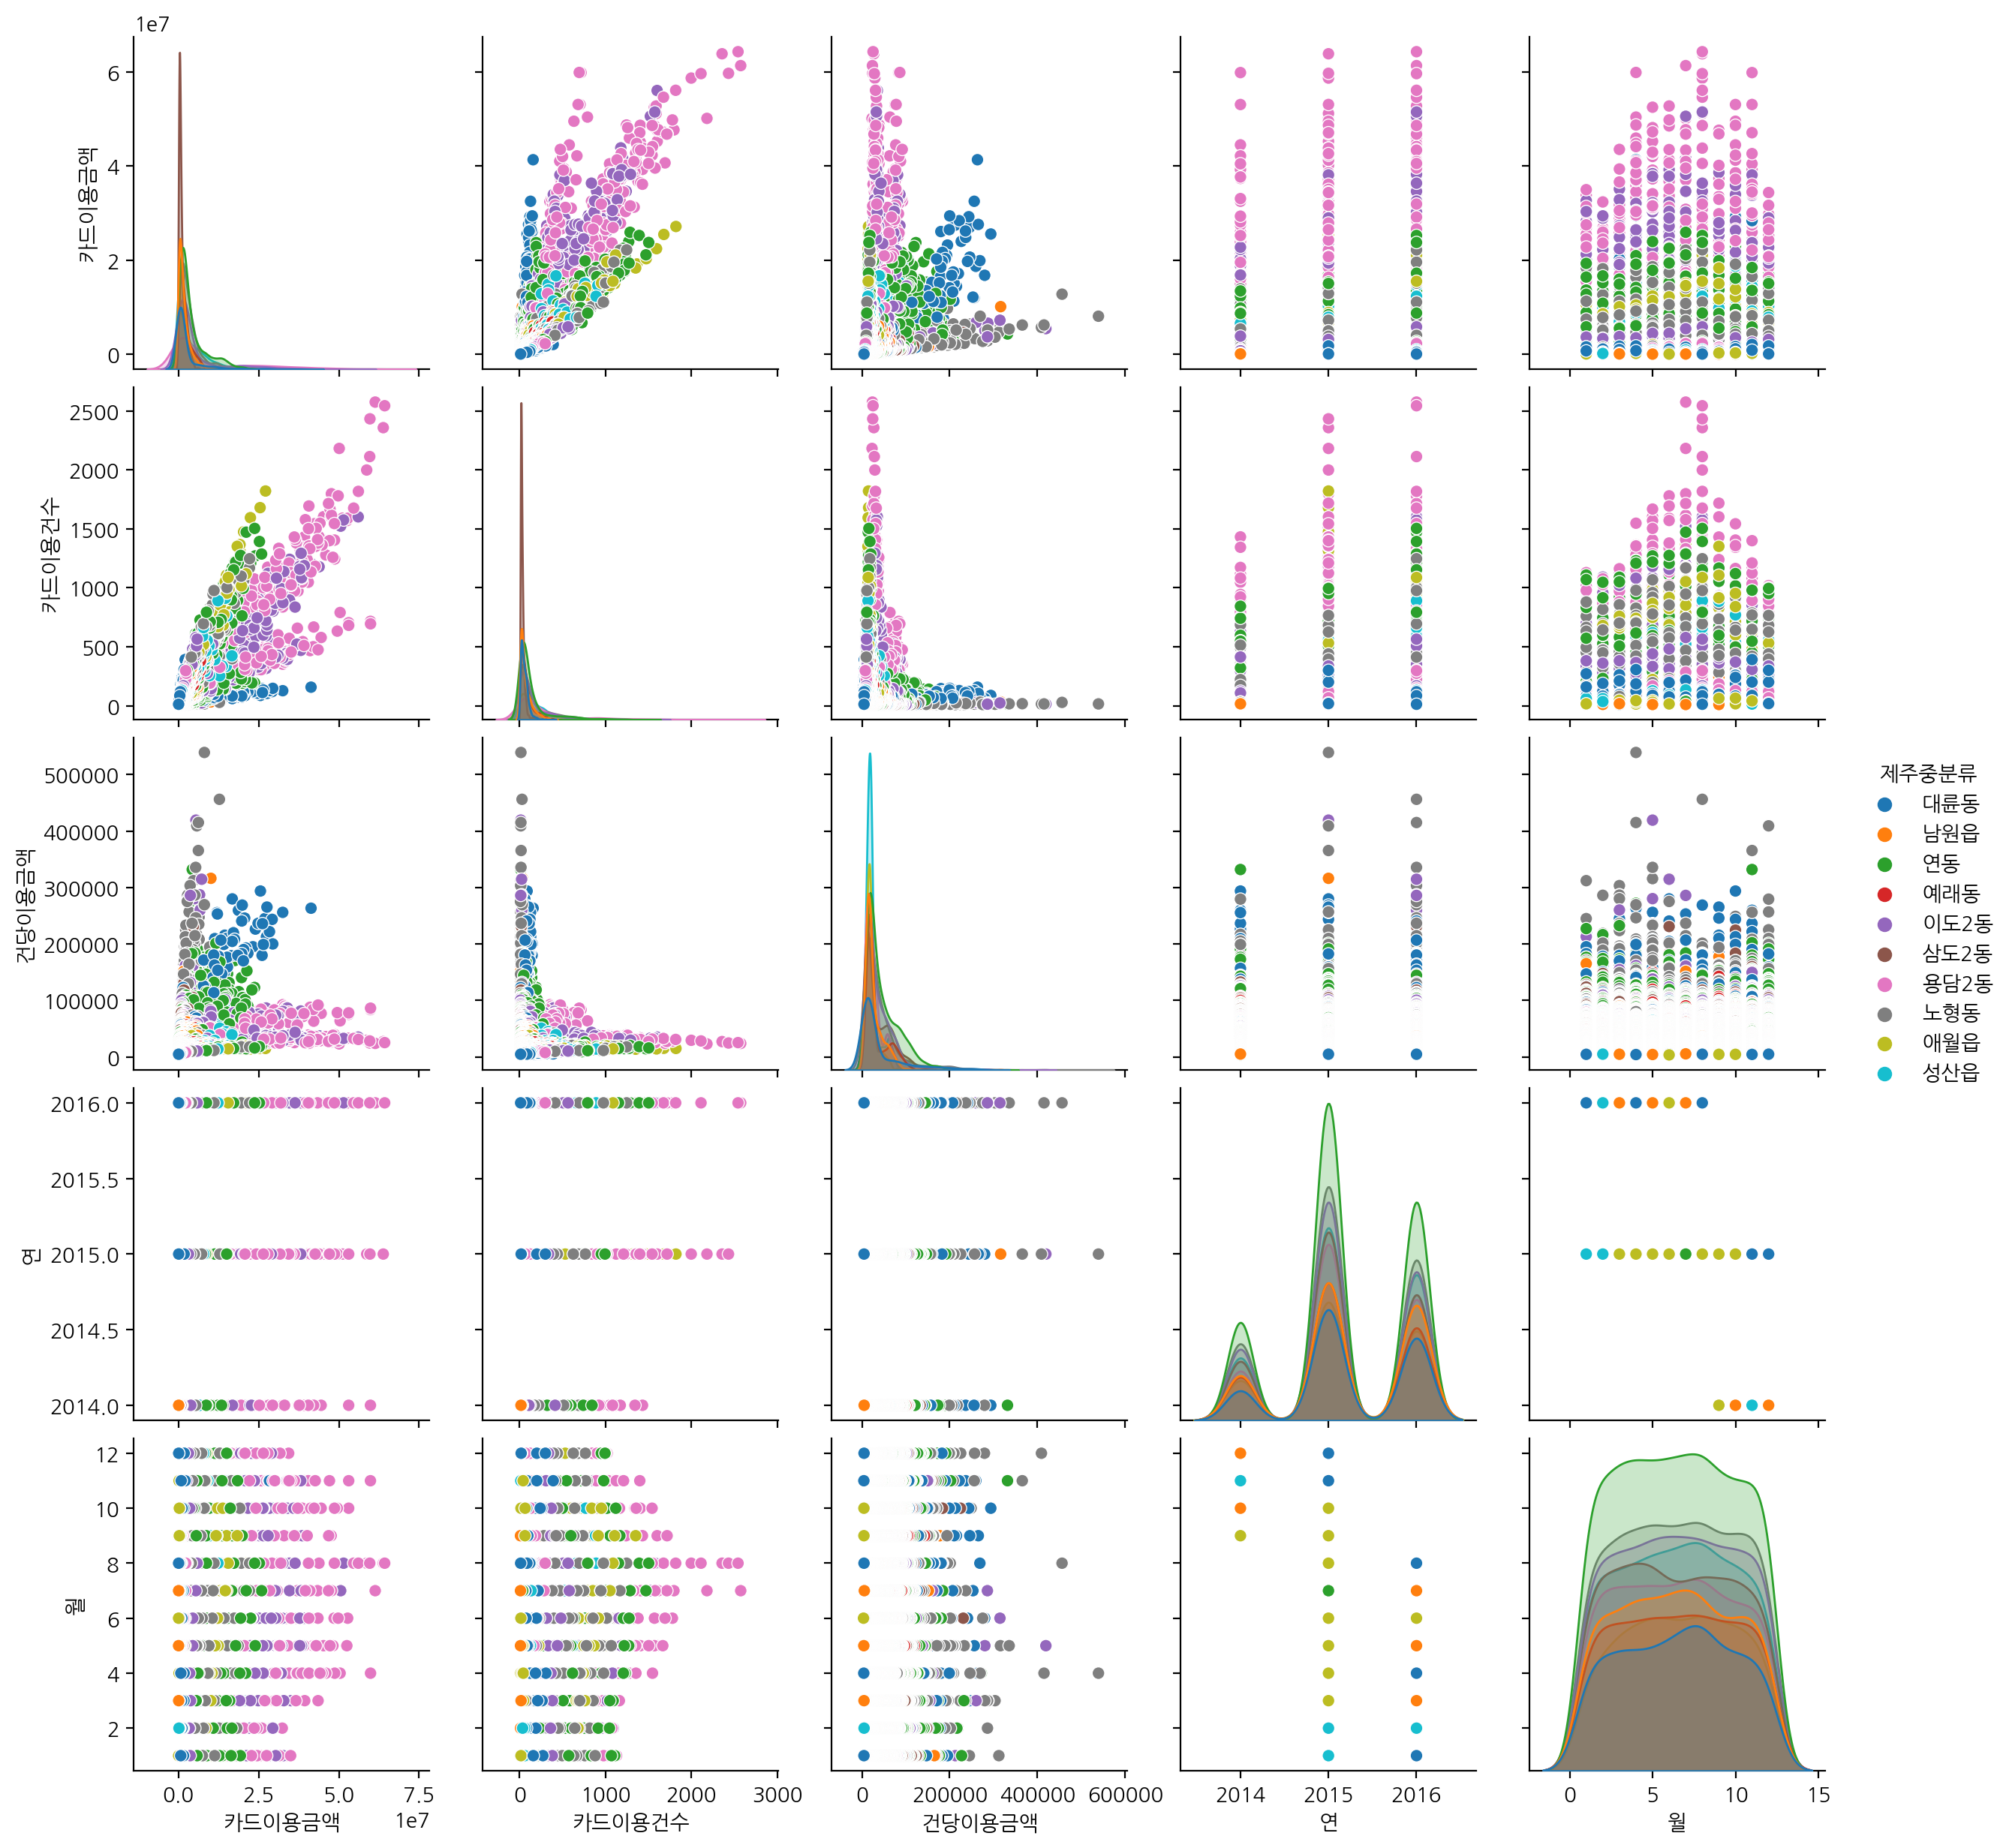

In [27]:
sns.pairplot(df, hue="제주중분류")

# 상관 분석

In [28]:
df.corr()

카드이용금액    카드이용건수    건당이용금액         연         월
카드이용금액  1.000000  0.818304  0.216464  0.036427  0.005433
카드이용건수  0.818304  1.000000 -0.132868  0.052075  0.004660
건당이용금액  0.216464 -0.132868  1.000000 -0.001620  0.004213
연       0.036427  0.052075 -0.001620  1.000000 -0.554862
월       0.005433  0.004660  0.004213 -0.554862  1.000000

In [29]:
corr=df.corr()
mask=np.triu(np.ones_like(corr))

<AxesSubplot:>

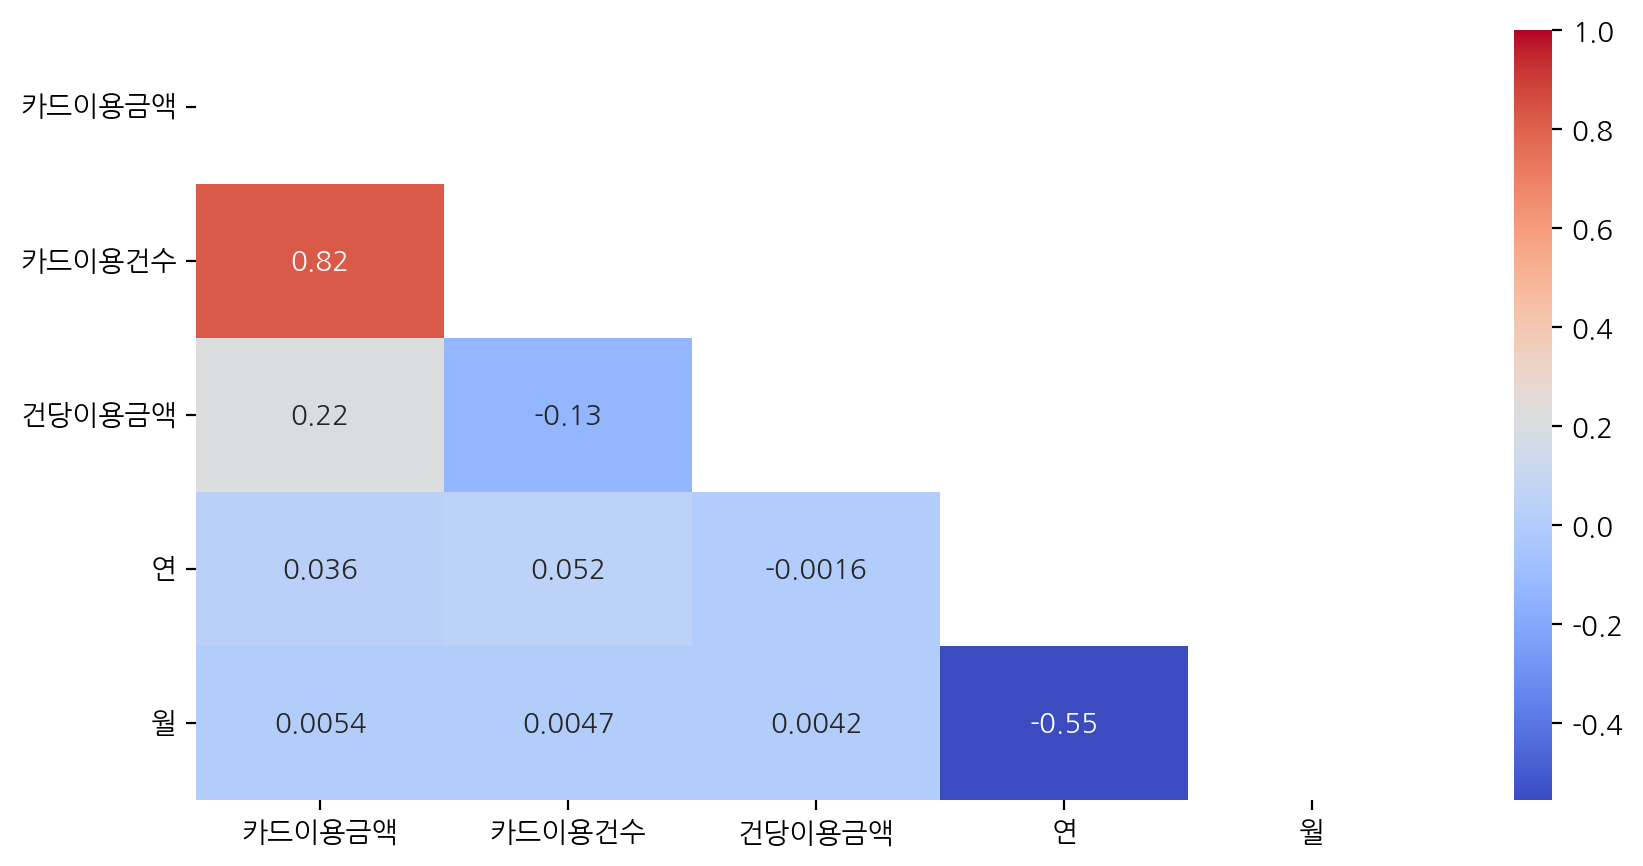

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, vmax=1, mask=mask)
# 역시 카드이용건수와 카드 이용금액은 강한 양의 상관관계
# 건당이용금액과 카드이용금액도 약간의 양의 상관관계

# 시각화
## 연도별 월별 카드 이용금액

<AxesSubplot:xlabel='연', ylabel='카드이용금액'>

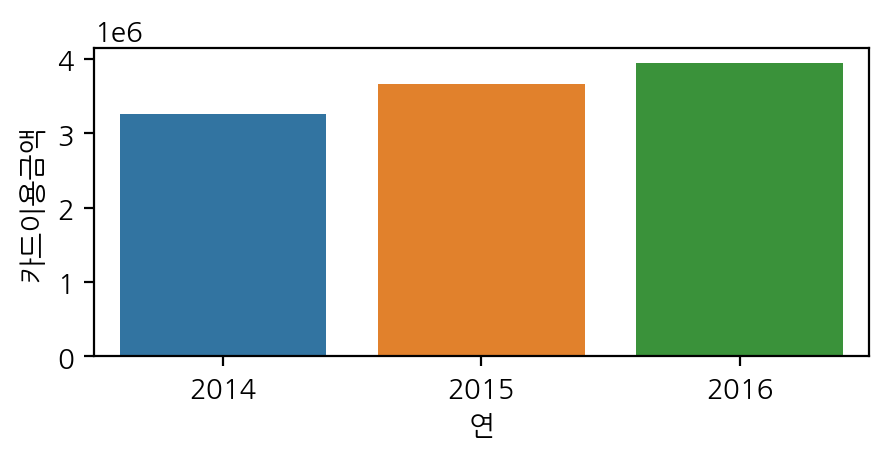

In [31]:
# 연도별 카드이용금액
# 해가 지날수록 금액이 늘어난다. 여행객이 늘어서? 이유가 뭘까
plt.figure(figsize=(5,2))
sns.barplot(data=df, x="연", y="카드이용금액", ci=None)

<AxesSubplot:xlabel='월', ylabel='카드이용금액'>

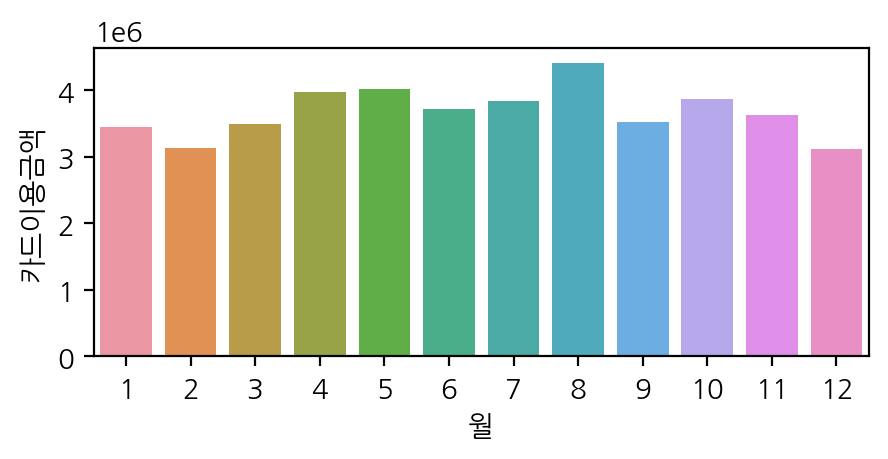

In [32]:
# 월별 카드이용금액
# 하지만 위의 상관관계에서 보았듯이 상관관계가 0.0054로 낮기 때문에 뚜렷한 관계성은 추론하기 힘들다.
plt.figure(figsize=(5,2))
sns.barplot(data=df, x="월", y="카드이용금액", ci=None)

## 그룹바이, 피봇테이블

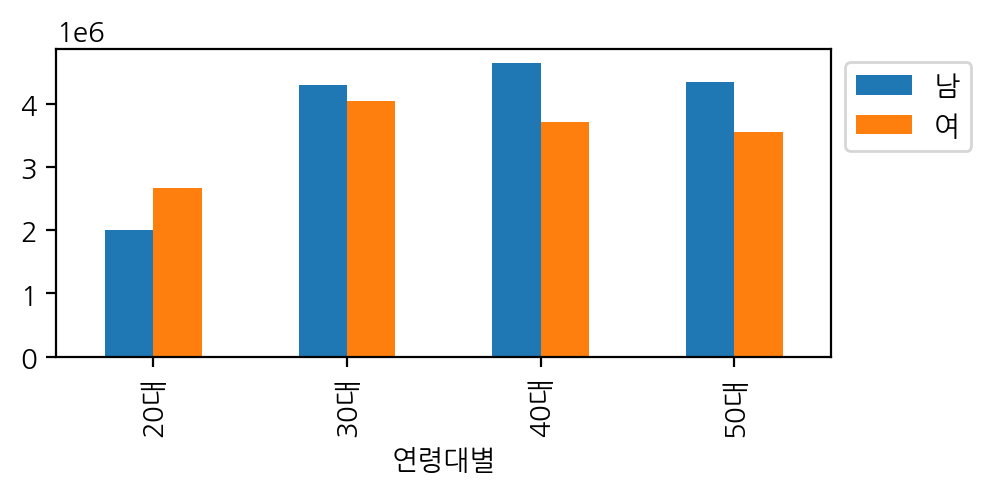

In [33]:
df.groupby(["연령대별", "성별"])["카드이용금액"].mean().unstack().plot.bar(figsize=(5,2))
plt.legend(bbox_to_anchor=(1,1))

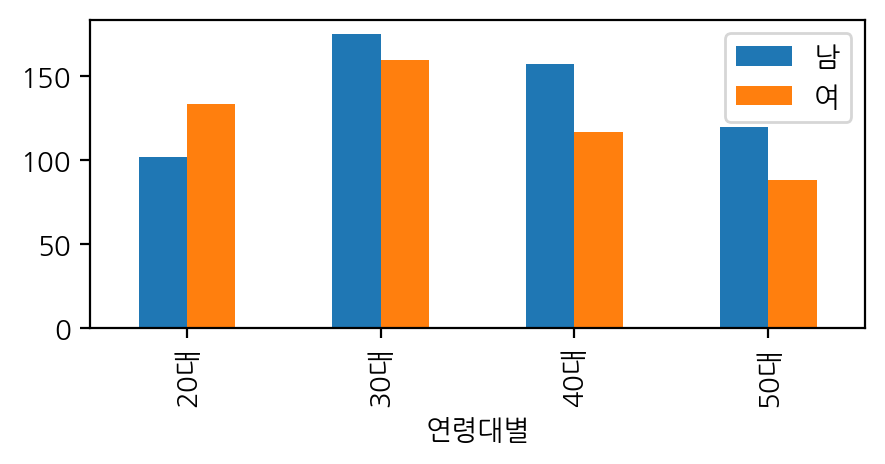

In [45]:
df.groupby(["연령대별", "성별"])["카드이용건수"].mean().unstack().plot.bar(figsize=(5,2))
plt.legend(bbox_to_anchor=(1,1))

<AxesSubplot:xlabel='업종명,성별'>

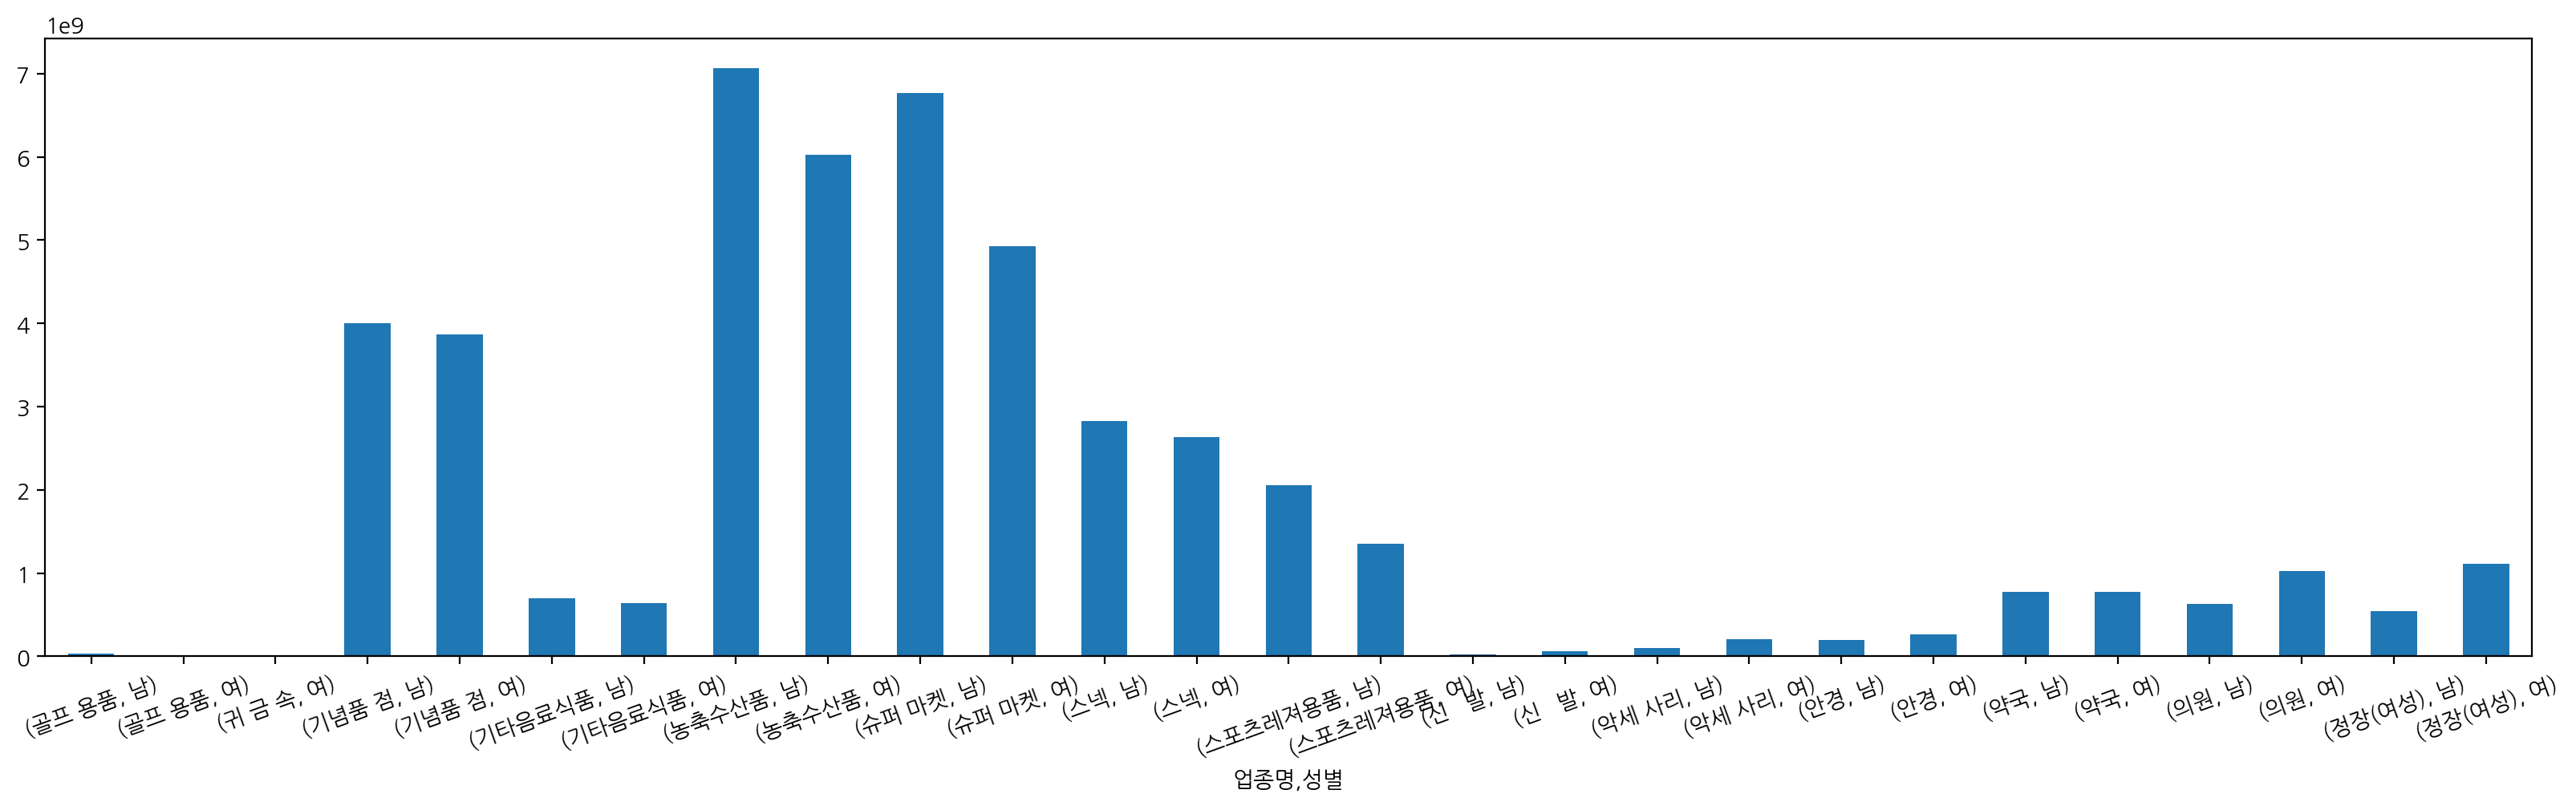

In [35]:
# 슈퍼마켓과 기념품은 건당이용금액은 낮지만, 총 카드이용금액은 높다.
df.groupby(["업종명", "성별"])["카드이용금액"].sum().plot.bar(rot=20, figsize=(20,5))

<AxesSubplot:xlabel='업종명,성별'>

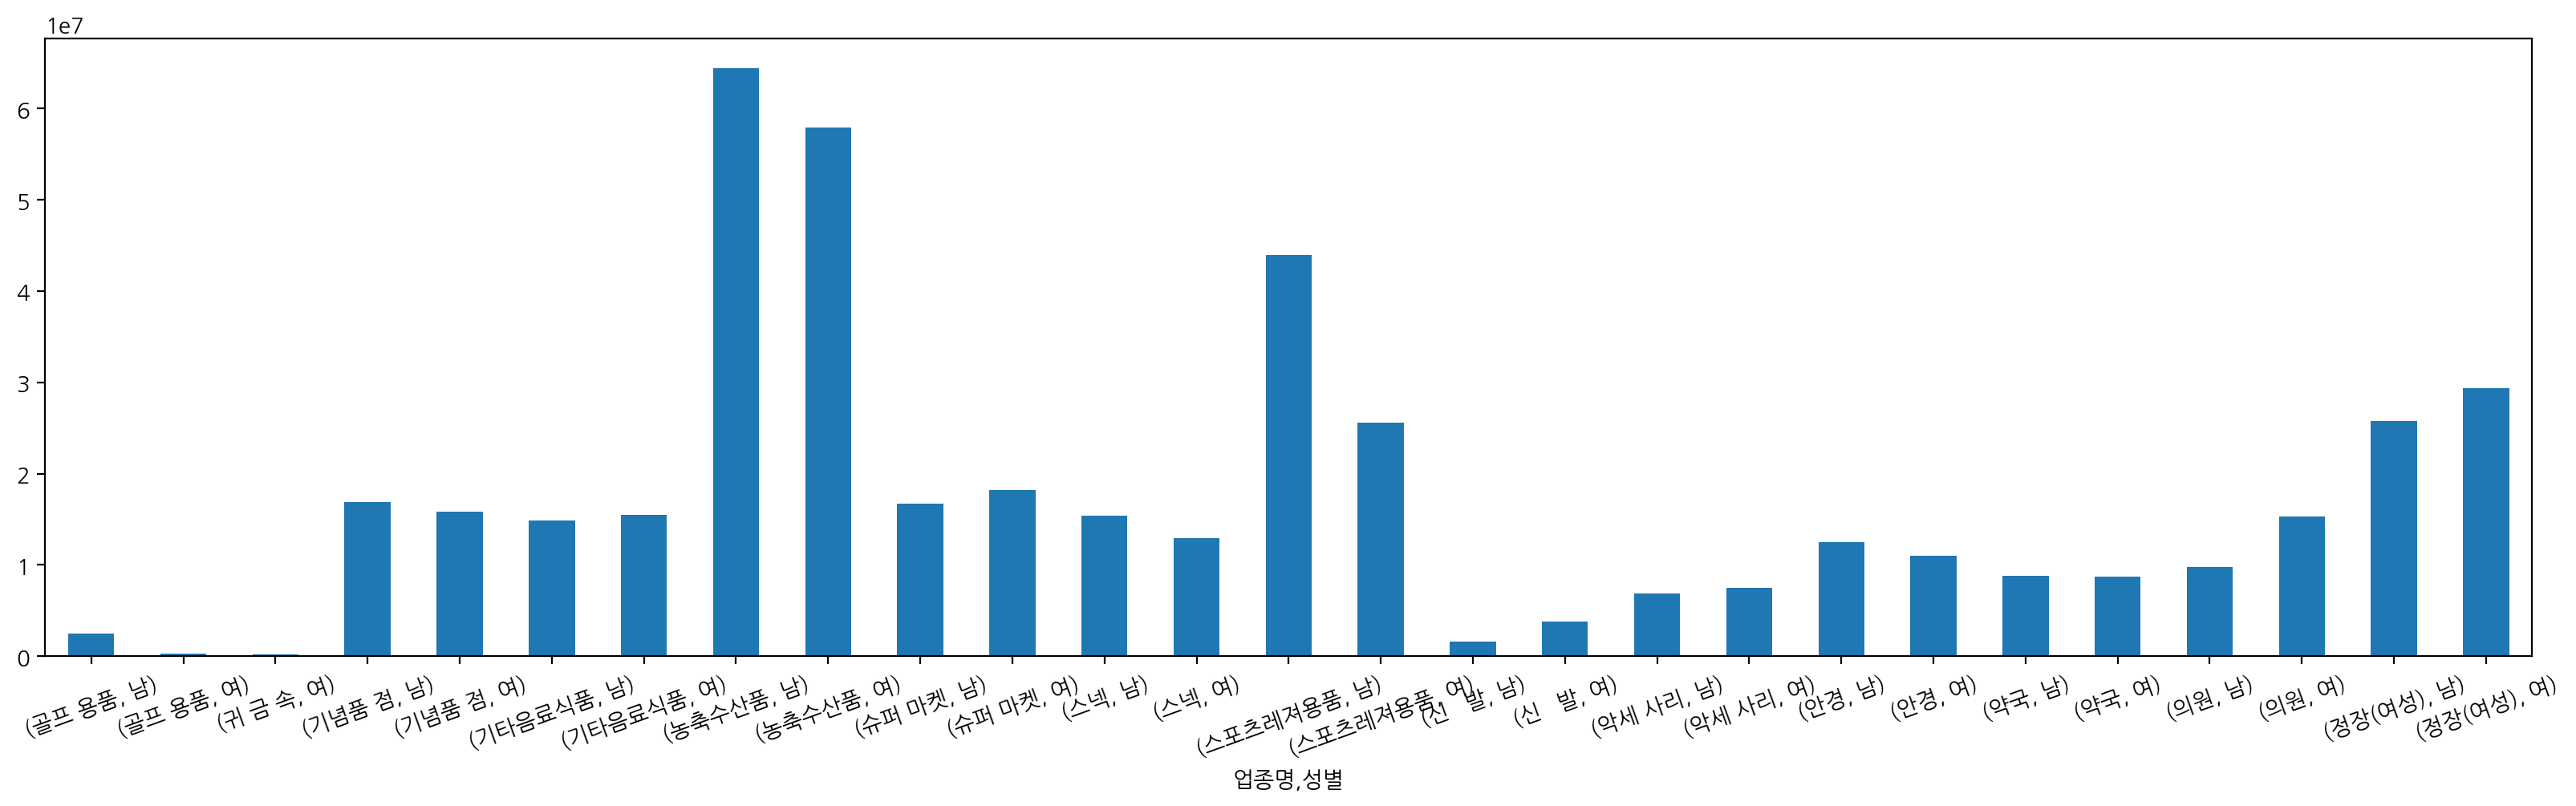

In [36]:
df.groupby(["업종명", "성별"])["건당이용금액"].sum().plot.bar(rot=20, figsize=(20,5))

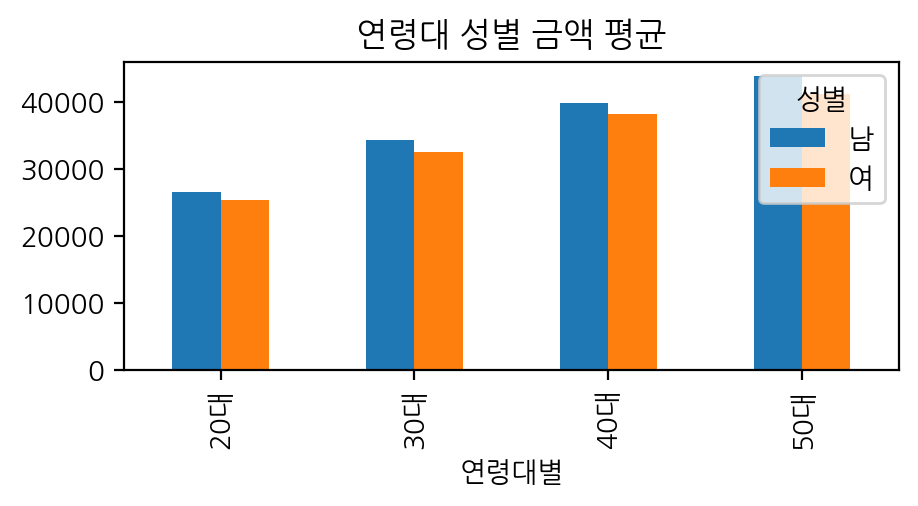

In [37]:
pd.pivot_table(data=df, index="연령대별", columns="성별", values = "건당이용금액", aggfunc=np.mean).plot.bar(figsize=(5,2), title="연령대 성별 금액 평균");

## 크로스탭

In [38]:
month_business = pd.crosstab(index=df["업종명"], columns=df["월"])
month_business.style.background_gradient(cmap="Oranges")

In [39]:
month_location = pd.crosstab(index=df["제주중분류"], columns=df["월"])
month_location.style.bar()

## plotly

In [40]:
px.histogram(df["업종명"], marginal="box", nbins=50)

## regplot, catplot

<AxesSubplot:xlabel='카드이용금액', ylabel='카드이용건수'>

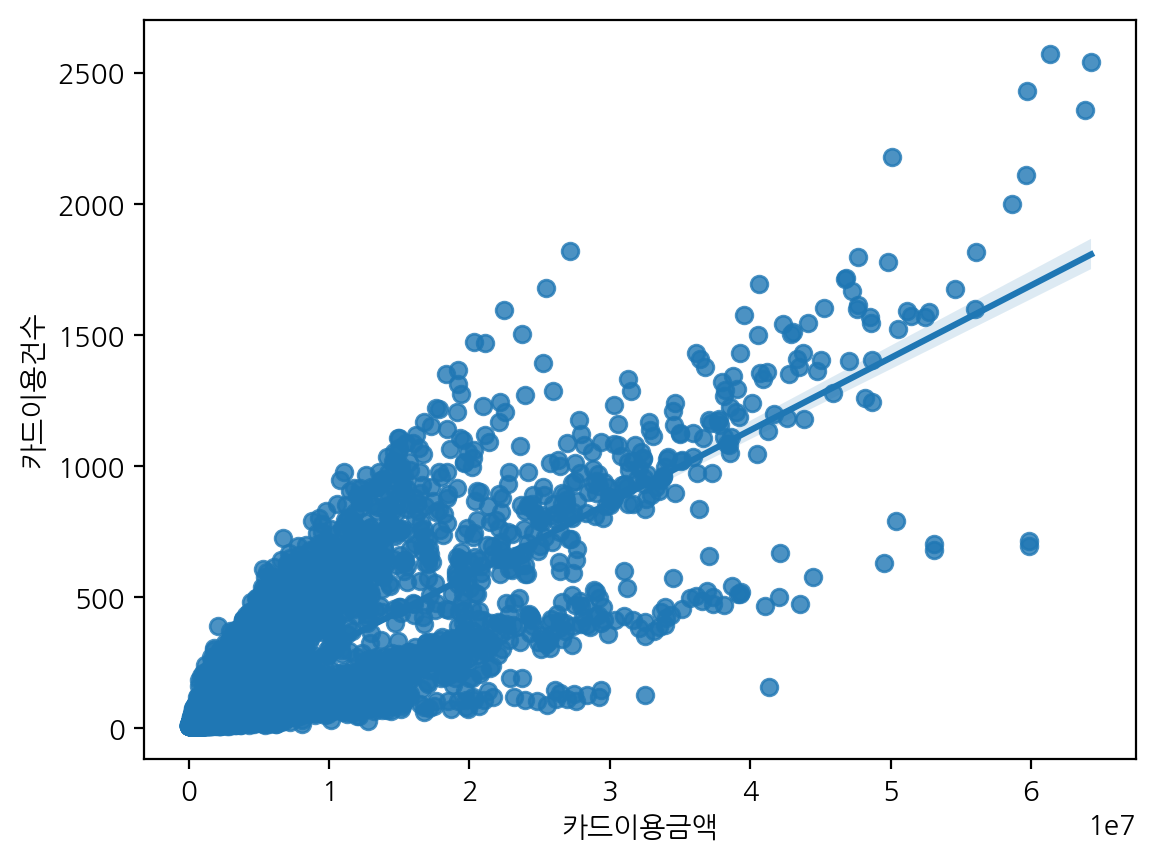

In [41]:
sns.regplot(data=df, x="카드이용금액", y="카드이용건수")

## 적합하지 않은 시각화

<Figure size 500x500 with 0 Axes>

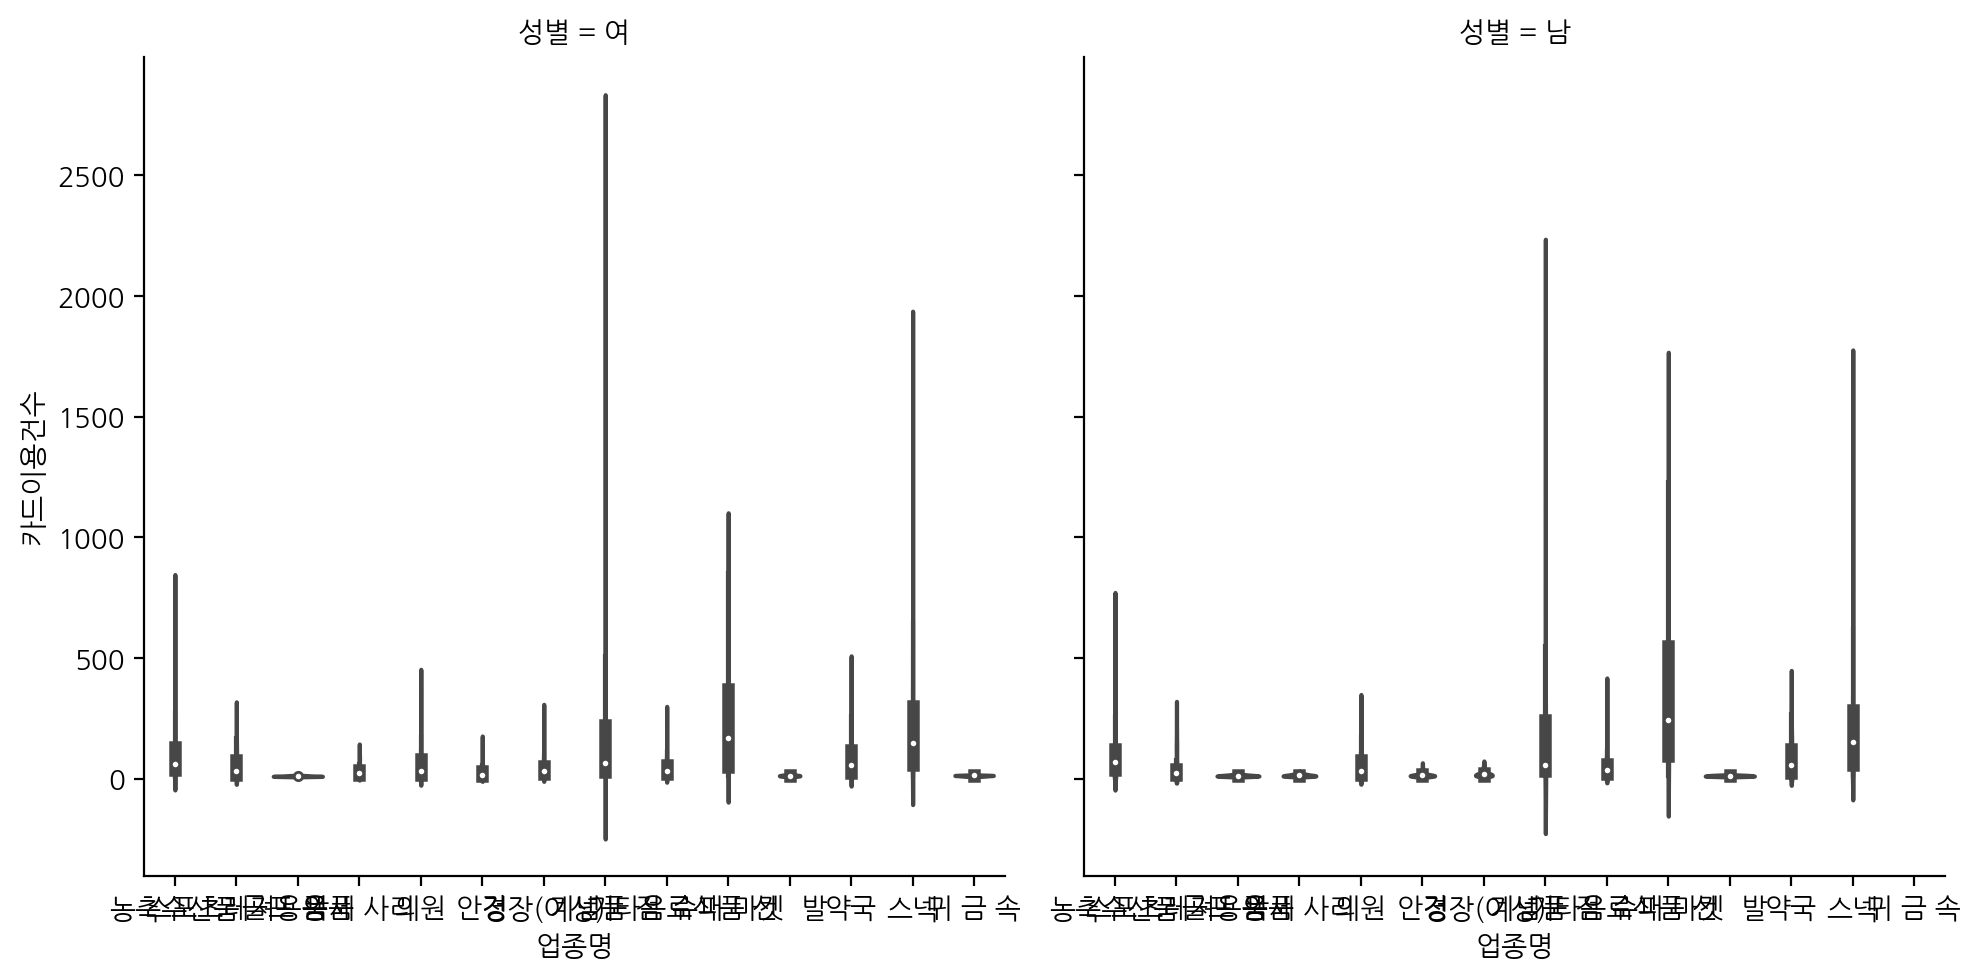

In [42]:
plt.figure(figsize=(5,5))
sns.catplot(data=df, x="업종명", y="카드이용건수", kind="violin", col="성별", col_wrap=2, bbox_to_anchor=(1,1))

<AxesSubplot:>

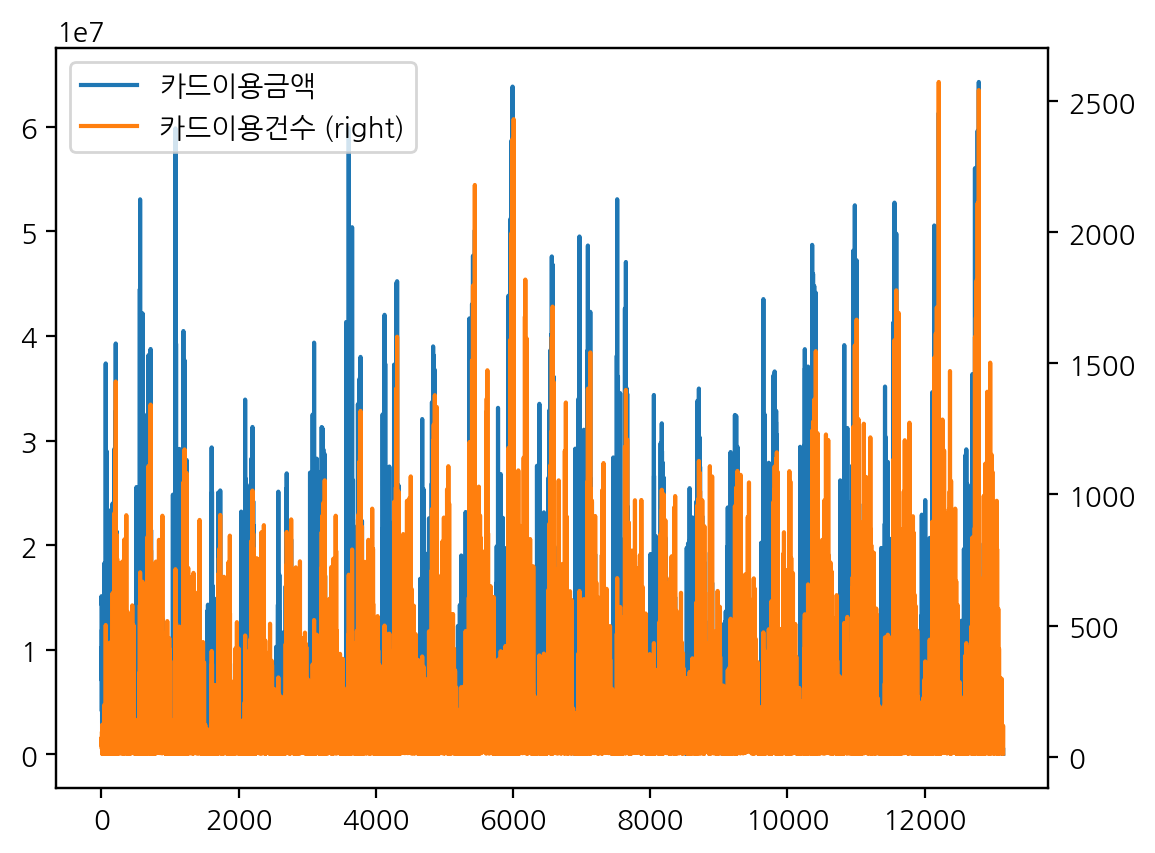

In [43]:
df[["카드이용금액", "카드이용건수"]].plot(secondary_y="카드이용건수")

<AxesSubplot:>

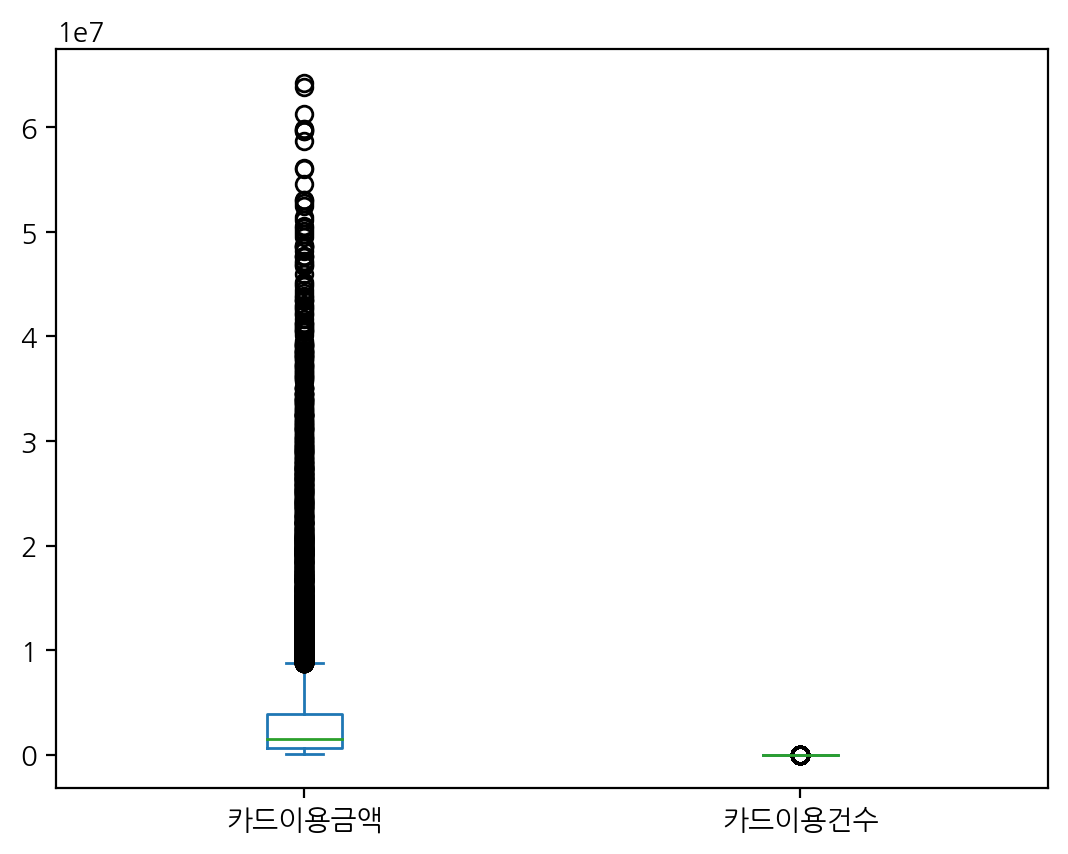

In [49]:
df[["카드이용금액", "카드이용건수"]].plot(kind="box", stacked=True)

In [52]:
# px.line하면 제대로된 시각화가 나타나지 않아서 barplot으로 시도해봄.
px.bar(df, x="연령대별", y="건당이용금액", width=300, height=500)